<h2> 인구밀도 데이터 전처리</h2>

In [87]:
import pandas as pd

# 엑셀 파일 읽기
excel_file = 'data/2023년도 지역별 인구밀도.xlsx'
df = pd.read_excel(excel_file, engine='openpyxl')

# 데이터프레임을 JSON 형식으로 변환
json_data = df.to_json(orient='records', force_ascii=False)

# JSON 파일로 저장
with open('data/2023지역별인구밀도.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_data)

In [88]:
import pandas as pd

# JSON 파일 읽기
json_file = 'data/2023지역별인구밀도.json'
df = pd.read_json(json_file)

# 첫 번째 행을 헤더로 설정하고, 나머지 행을 데이터로 설정
df.columns = df.iloc[0]  # 첫 번째 행을 열 이름으로 사용
df = df.drop(0).reset_index(drop=True)  # 첫 번째 행을 데이터에서 제거

# 컬럼 이름에 None이 있는 경우 처리
df.columns = df.columns.fillna('Unnamed')

# 데이터 확인: 현재 열 이름을 출력하여 확인합니다.
print("데이터 컬럼 확인:")
print(df.columns)

# 불필요한 열 제거: 'Unnamed'로 시작하는 열 이름을 사용
df = df[['Unnamed', '인구', '인구밀도']]  # 필요한 열만 선택

# 컬럼 이름 변경
df.columns = ['지역', '인구', '인구밀도']

# '계' 행 제거 (합계 관련 행)
df = df[df['지역'] != '계'].reset_index(drop=True)

# 쉼표 제거 후 숫자형으로 변환
df['인구'] = df['인구'].apply(lambda x: int(x.replace(',', '')) if isinstance(x, str) else x)
df['인구밀도'] = df['인구밀도'].apply(lambda x: int(x.replace(',', '')) if isinstance(x, str) else x)

# 인구밀도 단위 변경 (천명/㎢로 변환)
df['인구밀도'] = df['인구밀도'] / 1000  # 천명으로 변환

# 데이터 확인
print("전처리된 데이터 확인:")
print(df.head())  # 전처리된 데이터 확인


데이터 컬럼 확인:
Index(['Unnamed', '인구', '인구밀도'], dtype='object', name=0)
전처리된 데이터 확인:
   지역    인구    인구밀도
0  서울  9400  15.533
1  부산  3284   4.258
2  대구  2360   2.666
3  인천  3009   2.820
4  광주  1463   2.921


<h2>2024 전국 문화기반시설 총람 데이터 전처리</h2>

In [90]:
import pandas as pd

# 엑셀 파일 읽기
excel_file = 'data/2024 전국 문화기반시설 총람.xlsx'

# 엑셀 파일 내의 모든 시트(탭) 읽기
df = pd.read_excel(excel_file, sheet_name=None)

# 각 시트를 JSON 파일로 저장
for sheet_name, data in df.items():
    # JSON 파일로 저장
    json_file = f'data/{sheet_name}.json'
    data.to_json(json_file, orient='records', force_ascii=False, indent=4)

    print(f'{sheet_name} 탭이 {json_file}로 저장되었습니다.')


국립도서관 탭이 data/국립도서관.json로 저장되었습니다.
공공도서관 탭이 data/공공도서관.json로 저장되었습니다.
박물관 탭이 data/박물관.json로 저장되었습니다.
미술관 탭이 data/미술관.json로 저장되었습니다.
생활문화센터 탭이 data/생활문화센터.json로 저장되었습니다.
문예회관 탭이 data/문예회관.json로 저장되었습니다.
지방문화원 탭이 data/지방문화원.json로 저장되었습니다.
문화의집 탭이 data/문화의집.json로 저장되었습니다.
문학관 탭이 data/문학관.json로 저장되었습니다.
(부록)지역문화재단 탭이 data/(부록)지역문화재단.json로 저장되었습니다.


In [91]:
import pandas as pd
import json

# JSON 파일 로드
json_file = 'data/2024_전국_문화기반시설_총람.json'

# JSON 데이터 로드
with open(json_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 국립도서관 데이터 로드
df_national = pd.DataFrame(data["국립도서관"])

# 필요한 컬럼만 선택 (시도, 시군구, 설립주체, 도서관명, 주소)
df_national_cleaned = df_national[['연번','시도', '시군구', '설립주체', '도서관명', '주소']]

# 데이터 확인
print(df_national_cleaned.head())

# JSON 파일로 저장 (orient='records'로 저장하여 각 행을 개별 JSON 객체로 저장)
df_national_cleaned.to_json('data/국립도서관_cleaned.json', orient='records', force_ascii=False, indent=4)


    연번  시도   시군구 설립주체      도서관명                          주소
0  1.0  서울   서초구   국립   국립중앙도서관    서울특별시 서초구 반포대로 201 (반포동)
1  2.0  서울  영등포구   국립     국회도서관   서울특별시 영등포구 의사당대로 1 (여의도동)
2  3.0  서울   서초구   국립  국립장애인도서관    서울특별시 서초구 반포대로 201 (반포동)
3  4.0  경기   고양시   국립     법원도서관  경기도 고양시 일산동구 호수로 550 (장항동)


In [25]:
import pandas as pd
import json

# JSON 파일 로드
json_file = 'data/2024_전국_문화기반시설_총람.json'

# JSON 데이터 로드
with open(json_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 공공도서관 데이터 로드
df_public = pd.DataFrame(data["공공도서관"])

# 필요한 컬럼만 선택 (연번, 시도, 시군구, 설립주체, 도서관명)
df_public_cleaned = df_public[['연번', '시도', '시군구', '설립주체', '도서관명','주소']]

# 데이터 확인
print(df_public_cleaned.head())

# JSON 파일로 저장
df_public_cleaned.to_json('data/공공도서관_cleaned.json', orient='records', force_ascii=False, indent=4)


  연번  시도  시군구 설립주체             도서관명                                        주소
0  1  서울  강남구  교육청    서울특별시교육청강남도서관  서울특별시 강남구 선릉로116길 45 (삼성동) 서울특별시교육청강남도서관
1  2  서울  강남구  교육청    서울특별시교육청개포도서관   서울특별시 강남구 선릉로4길 30 (개포동) 서울특별시교육청 개포도서관
2  3  서울  강동구  교육청    서울특별시교육청강동도서관          서울특별시 강동구 양재대로116길 57 (길동) 강동도서관
3  4  서울  강동구  교육청  서울특별시교육청고덕평생학습관           서울특별시 강동구 고덕로 295 (고덕동) 고덕평생학습관
4  5  서울  강서구  교육청    서울특별시교육청강서도서관          서울특별시 강서구 등촌로51나길 29 (등촌동) 강서도서관


In [31]:
import pandas as pd
import json

# JSON 파일 로드
json_file = 'data/2024_전국_문화기반시설_총람.json'

# JSON 데이터 로드
with open(json_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 문예회관 데이터 로드
df_culture = pd.DataFrame(data["문예회관"])

# 첫 번째 행(결측값)을 제거
df_culture_cleaned = df_culture.dropna(how='all').reset_index(drop=True)

# 필요한 컬럼만 선택 (연번, 시도, 시군구, 건립주체, 시설명, 주    소)
df_culture_cleaned = df_culture_cleaned[['연번', '시도', '시군구', '시설명', '주    소']]

# 데이터 확인
print(df_culture_cleaned.head())

# JSON 파일로 저장
df_culture_cleaned.to_json('data/문예회관_cleaned.json', orient='records', force_ascii=False, indent=4)


    연번     시도  시군구       시설명                   주    소
0  NaN    NaN  NaN       NaN                      NaN
1  1.0  서울특별시  강남구    강남구민회관  서울특별시 강남구 삼성로 154 (대치동)
2  2.0  서울특별시  강동구    강동아트센터         서울특별시 강동구 동남로870
3  3.0  서울특별시  강북구  강북문화예술회관        서울특별시 강북구 삼각산로 85
4  4.0  서울특별시  강서구    강서구민회관        서울특별시 강서구 우장산로 66


In [86]:
import pandas as pd

# Excel 파일 경로
file_path = 'data/2024 전국 문화기반시설 총람.xlsx'

# '박물관' 시트에서 데이터 로드
df_museum = pd.read_excel(file_path, sheet_name='박물관')

# 열 이름의 공백 제거
df_museum.columns = df_museum.columns.str.strip()

# 불필요한 'Unnamed'로 시작하는 열 제거
df_museum_cleaned = df_museum.loc[:, ~df_museum.columns.str.contains('^Unnamed')]

# 필요한 열만 선택 (연번, 시도, 시군구, 박물관명, 주소)
df_museum_cleaned = df_museum_cleaned[['연번', '시도', '시군구', '박물관명', '주소']]

# 연번 1번, 2번 삭제
df_museum_cleaned = df_museum_cleaned.drop([0, 1])  # 첫 번째, 두 번째 행 삭제

# 연번을 1부터 새로 매기기
df_museum_cleaned['연번'] = range(1, len(df_museum_cleaned) + 1)

# 데이터 확인
print(df_museum_cleaned.head())

# CSV 파일로 저장
df_museum_cleaned.to_json('data/박물관_cleaned_with_new_연번.json', orient='records', force_ascii=False, indent=4)


   연번  시도  시군구                          박물관명                  주소
2   1  서울  용산구                       국립중앙박물관  서울특별시 용산구 서빙고로 137
3   2  서울  종로구                       국립민속박물관    서울특별시 종로구 삼청로 37
4   3  경기  파주시  국립민속박물관 파주\n(개방형 수장고 및 정보센터)    경기도 파주시 헤이리로 30 
5   4  서울  종로구                     대한민국역사박물관  서울특별시 종로구 세종대로 198
6   5  서울  용산구                       국립한글박물관  서울특별시 용산구 서빙고로 139


In [74]:
# 데이터 확인
print(df_museum_cleaned.head())


    연번   시도  시군구                          박물관명                  주소
0  NaN  NaN  NaN                           NaN                 NaN
1  NaN  NaN  NaN                           NaN                 NaN
2  1.0   서울  용산구                       국립중앙박물관  서울특별시 용산구 서빙고로 137
3  2.0   서울  종로구                       국립민속박물관    서울특별시 종로구 삼청로 37
4  NaN   경기  파주시  국립민속박물관 파주\n(개방형 수장고 및 정보센터)    경기도 파주시 헤이리로 30 


<script type="text/javascript" src="https://ssl.gstatic.com/trends_nrtr/3940_RC01/embed_loader.js"></script> <script type="text/javascript"> trends.embed.renderExploreWidget("TIMESERIES", {"comparisonItem":[{"keyword":"영화관","geo":"KR","time":"today 12-m"},{"keyword":"박물관","geo":"KR","time":"today 12-m"},{"keyword":"미술관","geo":"KR","time":"today 12-m"}],"category":0,"property":""}, {"exploreQuery":"geo=KR&q=%EC%98%81%ED%99%94%EA%B4%80,%EB%B0%95%EB%AC%BC%EA%B4%80,%EB%AF%B8%EC%88%A0%EA%B4%80&hl=ko&date=today 12-m,today 12-m,today 12-m","guestPath":"https://trends.google.co.kr:443/trends/embed/"}); </script>

<script type="text/javascript" src="https://ssl.gstatic.com/trends_nrtr/3940_RC01/embed_loader.js"></script> <script type="text/javascript"> trends.embed.renderExploreWidget("TIMESERIES", {"comparisonItem":[{"keyword":"영화관","geo":"KR","time":"today 12-m"},{"keyword":"박물관","geo":"KR","time":"today 12-m"},{"keyword":"미술관","geo":"KR","time":"today 12-m"}],"category":0,"property":""}, {"exploreQuery":"geo=KR&q=%EC%98%81%ED%99%94%EA%B4%80,%EB%B0%95%EB%AC%BC%EA%B4%80,%EB%AF%B8%EC%88%A0%EA%B4%80&hl=ko&date=today 12-m,today 12-m,today 12-m","guestPath":"https://trends.google.co.kr:443/trends/embed/"}); </script>

<h2>네이버 리뷰 크롤링</h2>

In [126]:
pip install selenium


Note: you may need to restart the kernel to use updated packages.


In [148]:
from selenium.webdriver.common.by import By
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import datetime
import requests
import csv
from selenium.webdriver.chrome.service import Service

# url
url = 'https://m.place.naver.com/place/11621150/review/visitor'

# Webdriver headless mode setting
options = webdriver.ChromeOptions()
# options.add_argument('headless')
options.add_argument('window-size=1920x1080')
options.add_argument("disable-gpu")

# BS4 setting for secondary access
session = requests.Session()
headers = {
    "User-Agent": "user value"}

retries = Retry(total=5,
                backoff_factor=0.1,
                status_forcelist=[500, 502, 503, 504])

session.mount('http://', HTTPAdapter(max_retries=retries))

# New CSV file
now = datetime.datetime.now()
csv_file = 'naver_reviews_' + now.strftime('%Y-%m-%d_%H-%M-%S') + '.csv'

# Start crawling/scraping!
try:
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
    driver.get(url)
    
    # Wait until the page is fully loaded and the span element with class 'TeItc' is clickable
    WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CLASS_NAME, 'TeItc'))
    )
    
    # Click the span element with class 'TeItc' 30 times
    for i in range(30):  # Maximum 30 clicks
        try:
            # Find the span element by its class name and click it
            span_element = driver.find_element(By.CLASS_NAME, 'TeItc')
            span_element.click()
            time.sleep(2)  # Wait for the page to load after each click
        except Exception as e:
            print(f"Error during click {i + 1}: {e}")
            break  # If an error occurs, stop the process
    
    # Wait for some time after the last click to ensure all content has loaded
    time.sleep(5)
    
    # Get the page source after clicking
    html = driver.page_source
    bs = BeautifulSoup(html, 'lxml')
    
    # Extract the reviews
    reviews = bs.select('li.pui__X35jYm.EjjAW')  # Ensure this CSS selector is correct

    # If reviews are found, process them
    if reviews:
        print(f"Found {len(reviews)} reviews")
        
        # Write reviews to CSV file
        with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow(['content'])  # Writing the header
            for r in reviews:
                # content
                content = r.select_one('div.pui__vn15t2 > a')  # Ensure this selector is correct

                # exception handling
                content = content.text if content else ''

                # Write content to CSV
                writer.writerow([content])
                time.sleep(0.06)
    else:
        print("No reviews found.")
    
    print(f"Reviews saved to {csv_file}")

except Exception as e:
    print(e)
    # Save CSV file even if an error occurs
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['content'])  # Writing the header
    print(f"Reviews saved to {csv_file}")


Error during click 11: Message: no such element: Unable to locate element: {"method":"css selector","selector":".TeItc"}
  (Session info: chrome=131.0.6778.205); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x00000001008e3184 cxxbridge1$str$ptr + 3626716
1   chromedriver                        0x00000001008db9d4 cxxbridge1$str$ptr + 3596076
2   chromedriver                        0x0000000100348968 cxxbridge1$string$len + 89228
3   chromedriver                        0x000000010038cd50 cxxbridge1$string$len + 368756
4   chromedriver                        0x00000001003c65b4 cxxbridge1$string$len + 604376
5   chromedriver                        0x0000000100381568 cxxbridge1$string$len + 321676
6   chromedriver                        0x00000001003821b8 cxxbridge1$string$len + 324828
7   chromedriver                        0x00000001008ae9

<h2> 자연어 처리 </h2>

In [149]:
pip install konlpy scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 48.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.3/583.3 kB 25.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [159]:
import pandas as pd
from konlpy.tag import Okt
import string
from collections import Counter

# CSV 파일 경로
csv_file = 'data/국립중앙박물관_310.csv'

# 리뷰 데이터 불러오기
df = pd.read_csv(csv_file)

# 텍스트 컬럼 확인 (컬럼명이 'content'로 가정)
reviews = df['content'].dropna()

# 형태소 분석기 초기화
okt = Okt()

# 불용어 리스트 (수, 것, 등)
stop_words = set(['수', '것', '등'])

# 전처리 함수 정의
def preprocess(text):
    # 소문자화
    text = text.lower()
    
    # 구두점 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 형태소 분석 (명사만 추출)
    tokens = okt.nouns(text)  # 명사 추출
    
    # 불용어 제거
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

# 모든 리뷰에 전처리 적용하여 명사 추출
all_nouns = []
for review in reviews:
    nouns = preprocess(review)
    all_nouns.extend(nouns)

# 명사의 빈도수 계산
noun_counts = Counter(all_nouns)

# 가장 많이 사용된 상위 10개 명사 출력
most_common_nouns = noun_counts.most_common(10)

# 출력
print("국립중앙박물관 가장 많이 사용된 명사 10개:")
for noun, count in most_common_nouns:
    print(f"{noun}: {count}")


국립중앙박물관 가장 많이 사용된 명사 10개:
전시: 156
박물관: 132
유물: 91
중앙: 90
국립: 83
작품: 54
사람: 48
시간: 48
관람: 41
청자: 38


In [158]:
import pandas as pd
from konlpy.tag import Okt
import string
from collections import Counter

# CSV 파일 경로
csv_file = 'data/국립제주박물관_102.csv'

# 리뷰 데이터 불러오기
df = pd.read_csv(csv_file)

# 텍스트 컬럼 확인 (컬럼명이 'content'로 가정)
reviews = df['content'].dropna()

# 형태소 분석기 초기화
okt = Okt()

# 불용어 리스트 (수, 것, 등)
stop_words = set(['수', '것', '등'])

# 전처리 함수 정의
def preprocess(text):
    # 소문자화
    text = text.lower()
    
    # 구두점 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 형태소 분석 (명사만 추출)
    tokens = okt.nouns(text)  # 명사 추출
    
    # 불용어 제거
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

# 모든 리뷰에 전처리 적용하여 명사 추출
all_nouns = []
for review in reviews:
    nouns = preprocess(review)
    all_nouns.extend(nouns)

# 명사의 빈도수 계산
noun_counts = Counter(all_nouns)

# 가장 많이 사용된 상위 10개 명사 출력
most_common_nouns = noun_counts.most_common(10)

# 출력
print("국립제주박물관 가장 많이 사용된 명사 10개:")
for noun, count in most_common_nouns:
    print(f"{noun}: {count}")


국립제주박물관 가장 많이 사용된 명사 10개:
박물관: 41
제주: 40
아이: 28
전시: 25
무료: 23
어린이: 19
관람: 18
영상: 18
곳: 17
여행: 16


In [174]:
import pandas as pd

# CSV 파일 경로
csv_file = 'data/국립중앙박물관_310.csv'

# 리뷰 데이터 불러오기
df = pd.read_csv(csv_file)

# 데이터 구조 확인
print(df.head())  # 상위 5개의 데이터 출력
print(df.columns)  # 컬럼 확인


                                             content
0  중앙박물관 금속공예관의 유물 중 국보인 “물가풍경무늬정병”이 멋지다.국가유산청에서는...
1  국립중앙박물관의 특별전인 “푸른 세상을 빚다, 고려 상형청자”을 관람했다.전시 기간...
2  국립중앙박물관에 반가사유상보러다녀왔습니다무료로 입장이 가능하고 시즌별로다양한 작품들...
3  국립중앙박물관의 고려관이다.삼국시대와 통일신라를 지나 고려시대로 접어들며 유물은 보...
4  국립중앙박물관 특별전시관에서 ‘25. 3. 3.까지 전시되는 고려 상형청자의 일부이...
Index(['content'], dtype='object')


In [182]:
from konlpy.tag import Okt
import string

# 형태소 분석기 초기화
okt = Okt()

# 불용어 리스트 (필요시 수정)
stop_words = set(['수', '것', '등', '이', '그', '저'])

# 전처리 함수 정의
def preprocess(text):
    if isinstance(text, str):  # 텍스트만 처리하도록
        text = text.lower()  # 소문자화
        text = text.translate(str.maketrans('', '', string.punctuation))  # 구두점 제거
        tokens = okt.nouns(text)  # 명사 추출
        tokens = [word for word in tokens if word not in stop_words]  # 불용어 제거
        return " ".join(tokens)
    return ''  # 텍스트가 아닌 경우 빈 문자열 반환

# 결측값을 빈 문자열로 대체
df['content'] = df['content'].fillna('')

# 모든 리뷰에 전처리 적용
processed_reviews = [preprocess(review) for review in df['content']]


In [183]:
from sklearn.feature_extraction.text import CountVectorizer

# 단어 빈도 계산
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_reviews)

# 단어 빈도수 출력
word_freq = X.sum(axis=0).A1  # 각 단어의 빈도 수 합산
words = vectorizer.get_feature_names_out()  # 단어 목록

# 단어와 빈도수를 DataFrame으로 변환하여 출력
word_freq_df = pd.DataFrame(zip(words, word_freq), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# 상위 10개 단어 출력
print(word_freq_df.head(10))


     Word  Frequency
1270   전시        156
594   박물관        132
1129   유물         91
1392   중앙         90
192    국립         83
1231   작품         54
899    시간         48
730    사람         48
155    관람         41
1471   청자         38


In [188]:
from sklearn.cluster import KMeans

# TF-IDF 벡터화 후 KMeans 군집화
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_tfidf)

# 군집화된 리뷰 출력
df['Cluster'] = kmeans.labels_
for cluster_num in range(5):
    print(f"\nCluster {cluster_num+1} 리뷰:")
    cluster_reviews = df[df['Cluster'] == cluster_num]['content']
    for review in cluster_reviews:
        print(f"- {review}")



Cluster 1 리뷰:
- 구스타프 작품은 좀 부족하고  키스도 없어서 아쉬웠네요.에곤살레의 작품은 생각보다 훌륭함.원래는 항상 평일에보는데 친구땜에 일요일방문. 일욜 오후라서 관객이 너무 많았어요. 수욜과 토욜은 저녁도 가능하다니 토일 피해서 방문하시길 추천요.

Cluster 2 리뷰:
- 거장의 시선 전시 좋았어요
- 거장의 시선 유익했어요
- 거장의시선 전시회 너무 좋았다엽서가 좀 더 다양하게 있었으면!

Cluster 3 리뷰:
- 국립중앙박물관에서 ‘25. 3. 3.까지 전시되는 고려 상형청자 특별전이다.이번 특별전에서는 지금까지 보지 못했던 앙증맞은 원숭이 작품 세 점을 선보인다. 원숭이는 우리나라의 고유 동물이 아니다.고려시대라면 임금은 물론 백성 대부분도 원숭이를 보지 못했을 것이다. 손오공은 중국 고전소설 ‘서유기’의 주인공으로 원숭이를 모티브로 한 소설이다.서유기는 명나라 때 오승은(1500~1582)이 지은 작품이다.원숭이 모양의 묵호(먹물을 담는 작은 항아리)는 12세기 고려 때 만든 것이다.귀여운 원숭이 모양이라 인기가 많았겠다.당시 백성들은 원숭이란 동물을 알지 못했을 테니 중국에서 수입된 작품을 보고만들었겠단 생각이 든다.이런 작품을 볼 기회가 많지 않으니 얼른 시간을 내어야 볼 수 있다..

Cluster 4 리뷰:
- 중앙박물관 금속공예관의 유물 중 국보인 “물가풍경무늬정병”이 멋지다.국가유산청에서는 “청동은입사포류수금문정병”이란 어려운 이름을 붙였다.고려시대의 금속 공예품으로 높이 37.5㎝의 정병에 은입사(銀入絲)를 했다.정병은 깨끗한 물을 담는 병으로, 승려들이 지녀야 할 물품 중 하나였다.둥근 몸체에는 꽃무늬를 두르고, 우거진 갈대와 수양버들이 늘어진 언덕이 있으며, 주위로 오리와 물새들이 헤엄치거나 날아오르는 서정적인 풍경이다.먼 산에는 줄지어 철새가 날고 있고, 물 위에는 사공이 조각배를 젓고 있다. 은입사는 청동 바탕에 문양 부분을 파낸 뒤 은을 박아 장식한 기법이다.이 정병은 안정감 있고 유려한 곡선미를 보여주

In [209]:
#################### 함수 선언
def infinite_loop(browser, sleepDelay):
    # 최초 페이지 스크롤 설정
    # 스크롤 시키지 않았을 때의 전체 높이
    last_page_height = browser.execute_script("return document.documentElement.scrollHeight")

    while True:
        # 윈도우 창을 0에서 위에서 설정한 전체 높이로 이동
        browser.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(sleepDelay)
        # 스크롤 다운한 만큼의 높이를 신규 높이로 설정 
        new_page_height = browser.execute_script("return document.documentElement.scrollHeight")
        # 직전 페이지 높이와 신규 페이지 높이 비교
        if new_page_height == last_page_height:
            time.sleep(sleepDelay)
            # 신규 페이지 높이가 이전과 동일하면, while문 break
            if new_page_height == browser.execute_script("return document.documentElement.scrollHeight"):
                break
        else:
            last_page_height = new_page_height

def log_check(f, str):
    now = datetime.now()
    f_str = f"{now}    {str}"
    f.write(f_str + "\n")
    print(f_str)

In [5]:
import requests
from bs4 import BeautifulSoup
import urllib.parse

# 검색어 입력
keyword = '국립제주박물관'
encText = urllib.parse.quote(keyword)

# 네이버 검색 URL
url = f"https://search.naver.com/search.naver?query={encText}&where=blog"

# 검색 결과 페이지 요청
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    # 블로그 게시물 링크 추출
    blog_links = [a['href'] for a in soup.find_all('a', {'class': 'api_txt_lines'})]
else:
    print(f"Error: {response.status_code}")


<h2>데이터 정제</h2>

In [14]:
import pandas as pd
import re
from konlpy.tag import Okt

# 불용어 리스트 (필요에 따라 수정)
stopwords = ['이', '가', '은', '는', '에', '의', '을', '를', '과', '와', '으로', '에서', '하고', '이상', '수']

# 텍스트 정제 함수
def clean_text(text):
    # 특수문자, 숫자 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    
    # 형태소 분석기를 이용해 명사만 추출
    okt = Okt()
    nouns = okt.nouns(text)
    
    # 불용어 제거
    filtered_nouns = [noun for noun in nouns if noun not in stopwords]
    
    # 단어들을 공백으로 연결
    return ' '.join(filtered_nouns)

# CSV 파일 불러오기
df = pd.read_csv('data/국립중앙박물관_contents.csv')

# 'content' 열의 텍스트 정제
df['cleaned_content'] = df['content'].apply(clean_text)

# 결과 확인 (상위 5개 데이터 출력)
print(df[['content', 'cleaned_content']].head())


                                             content  \
0  [서울 국립중앙박물관사유의방대한민국의 대표적인 국보인 반가사유상 두 점이 나란히 놓...   
1  [날씨가 추워지면서 밖으로 산책하기가참 고약(최악의 게으름뱅이라)한데요. 그나마 집...   
2  [서울여행기 2일차 입니다!! 저는 서울여행을 가면 막 다양한 동네보다 이 국립 중...   
3  [체리 방학 2일차.서울 이촌동에 있는 국립중앙박물관 어린이박물관에 다녀왔다1일차에...   
4  [ 국립중앙박물관50m© NAVER Corp.더보기 /OpenStreetMap지도 ...   

                                     cleaned_content  
0  서울 국립 중앙 박물관 사유 의방 대한민국 대표 국보 반가사유상 두 점 곳 서울 국...  
1  날씨 밖 산책 최악 게으름뱅이 집 근처 국립 중앙 박물관 저 요즘 일요일 산책 중앙...  
2  서울 여행기 일차 저 여행 가면 막 동네 국립 중앙 박물관 박물관 걸 더 보고 때문...  
3  체리 방학 일차 서울 이촌동 국립 중앙 박물관 어린이 박물관 일차 월미도 뽀로로 테...  
4  국립 중앙 박물관 더 보기 지도 데이터 지도 컨트롤러 범례 부동산 거리 읍 동시 도...  


<h2>감성 분석</h2>

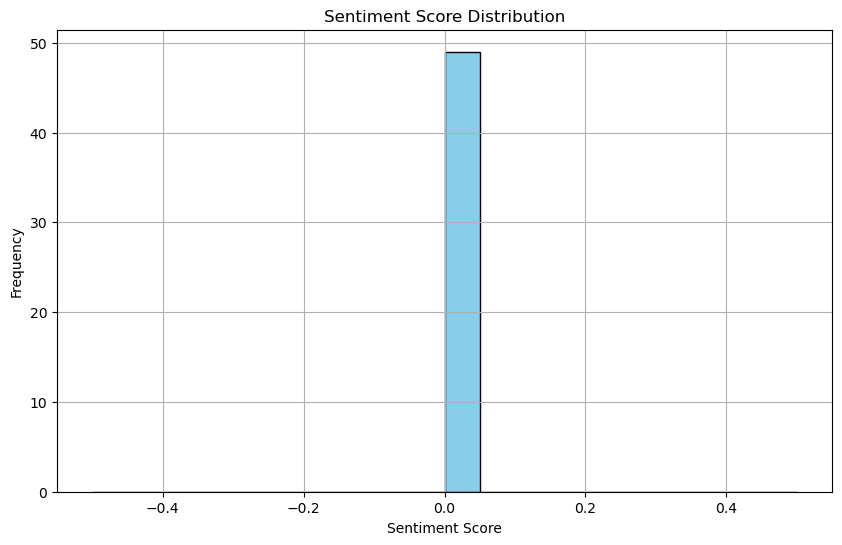

                                             content  sentiment_score
0  [서울 국립중앙박물관사유의방대한민국의 대표적인 국보인 반가사유상 두 점이 나란히 놓...                0
1  [날씨가 추워지면서 밖으로 산책하기가참 고약(최악의 게으름뱅이라)한데요. 그나마 집...                0
2  [서울여행기 2일차 입니다!! 저는 서울여행을 가면 막 다양한 동네보다 이 국립 중...                0
3  [체리 방학 2일차.서울 이촌동에 있는 국립중앙박물관 어린이박물관에 다녀왔다1일차에...                0
4  [ 국립중앙박물관50m© NAVER Corp.더보기 /OpenStreetMap지도 ...                0


In [19]:
import pandas as pd
import re
import json
from konlpy.tag import Okt
import matplotlib.pyplot as plt

# 감성 사전 로드 함수
def load_sentiment_dict(path):
    with open(path, 'r', encoding='utf-8') as f:
        sentiment_dict = json.load(f)
    return sentiment_dict

# 감성 분석 함수
def sentiment_score(text, sentiment_dict):
    score = 0
    words = text.split()
    for word in words:
        if word in sentiment_dict:
            score += sentiment_dict[word]
    return score

# 불용어 리스트 (필요에 따라 수정)
stopwords = ['이', '가', '은', '는', '에', '의', '을', '를', '과', '와', '으로', '에서', '하고', '이상', '수']

# 텍스트 정제 함수
def clean_text(text):
    # 특수문자, 숫자 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    
    # 형태소 분석기를 이용해 명사만 추출
    okt = Okt()
    nouns = okt.nouns(text)
    
    # 불용어 제거
    filtered_nouns = [noun for noun in nouns if noun not in stopwords]
    
    # 단어들을 공백으로 연결
    return ' '.join(filtered_nouns)

# 감성 사전 불러오기
sentiment_dict = load_sentiment_dict('data/SentiWord_info.json')

# CSV 파일 불러오기
df = pd.read_csv('data/국립중앙박물관_contents.csv')

# 'content' 열의 텍스트 정제
df['cleaned_content'] = df['content'].apply(clean_text)

# 각 리뷰에 대해 감성 점수 계산
df['sentiment_score'] = df['cleaned_content'].apply(lambda x: sentiment_score(x, sentiment_dict))

# 감성 점수 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 결과 확인 (상위 5개 데이터 출력)
print(df[['content', 'sentiment_score']].head())


Number of words with score 0: 154


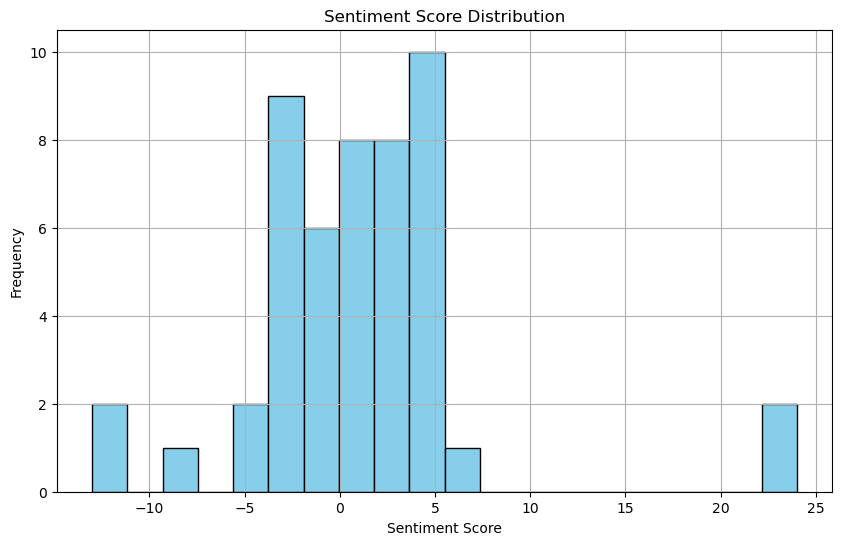

                                             content  sentiment_score
0  [국립제주박물관제주특별자치도 제주시 일주동로 17 국립제주박물관 안녕하세요 이웃님들...               -5
1  [  제주 동쪽 실내 가볼만한곳제주시 관광지  안녕하세요 오늘은 제주도 동쪽에 위치...               -3
2  [ 12월 제주 실내 가볼만한곳국립제주박물관  안녕하세요, 요즘 제법 날씨가 추워졌...                0
3  [춥고 바람 불때는 실내여행지로 대피하는 게 상책일 텐데요 ☃️거기에 입장료까지 무...                4
4  [“국립제주박물관”제주도박물관📍위치 제주시 일주동로 17 국립제주박물관📍운영시간 9...               -1


In [24]:
import pandas as pd
import re
import json
from konlpy.tag import Okt
import matplotlib.pyplot as plt

# 감성 사전 로드 함수
def load_sentiment_dict(path):
    with open(path, 'r', encoding='utf-8') as f:
        sentiment_data = json.load(f)
    
    # 리스트 형태라면 단어와 점수를 딕셔너리 형태로 변환
    sentiment_dict = {item['word']: int(item['polarity']) for item in sentiment_data}
    return sentiment_dict

# 감성 분석 함수
def sentiment_score(text, sentiment_dict):
    score = 0
    words = text.split()
    for word in words:
        if word in sentiment_dict:
            score += sentiment_dict[word]
    return score

# 불용어 리스트 (필요에 따라 수정)
stopwords = ['이', '가', '은', '는', '에', '의', '을', '를', '과', '와', '으로', '에서', '하고', '이상', '수']

# 텍스트 정제 함수
def clean_text(text):
    # 특수문자, 숫자 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    
    # 형태소 분석기를 이용해 명사만 추출
    okt = Okt()
    nouns = okt.nouns(text)
    
    # 불용어 제거
    filtered_nouns = [noun for noun in nouns if noun not in stopwords]
    
    # 단어들을 공백으로 연결
    return ' '.join(filtered_nouns)

# 감성 사전 불러오기
sentiment_dict = load_sentiment_dict('data/SentiWord_info.json')

# 감성 점수가 0인 단어 추출
zero_score_words = [word for word, score in sentiment_dict.items() if score == 0]
print(f"Number of words with score 0: {len(zero_score_words)}")

# CSV 파일 불러오기
df = pd.read_csv('data/국립제주박물관_contents.csv')

# 'content' 열의 텍스트 정제
df['cleaned_content'] = df['content'].apply(clean_text)

# 각 리뷰에 대해 감성 점수 계산
df['sentiment_score'] = df['cleaned_content'].apply(lambda x: sentiment_score(x, sentiment_dict))

# 감성 점수 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 결과 확인 (상위 5개 데이터 출력)
print(df[['content', 'sentiment_score']].head())


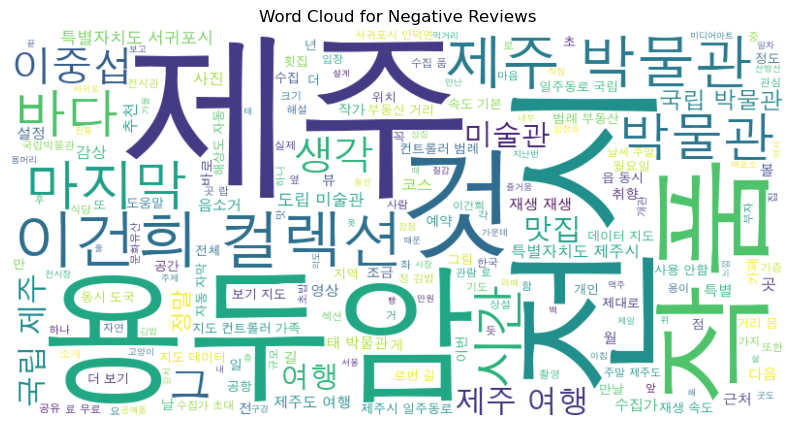

In [44]:
import pandas as pd
import re
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json

# 불용어 리스트 (필요에 따라 수정)
stopwords = ['이', '가', '은', '는', '에', '의', '을', '를', '과', '와', '으로', '에서', '하고', '이상', '수']

# 감성 사전 로드 함수
def load_sentiment_dict(path):
    with open(path, 'r', encoding='utf-8') as f:
        sentiment_data = json.load(f)
    
    # 단어와 감성 점수를 매핑 (polarity: 1, -1, 0)
    sentiment_dict = {item['word']: int(item['polarity']) for item in sentiment_data}
    return sentiment_dict

# 텍스트 정제 함수
def clean_text(text):
    # 특수문자, 숫자 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    
    # 형태소 분석기를 이용해 명사만 추출
    okt = Okt()
    nouns = okt.nouns(text)
    
    # 불용어 제거
    filtered_nouns = [noun for noun in nouns if noun not in stopwords]
    
    # 단어들을 공백으로 연결
    return ' '.join(filtered_nouns)

# 감성 점수 계산 함수
def sentiment_score(text, sentiment_dict):
    score = 0
    words = text.split()
    for word in words:
        if word in sentiment_dict:
            score += sentiment_dict[word]
    return score

# 감성 사전 로드
sentiment_dict = load_sentiment_dict('data/SentiWord_info.json')

# CSV 파일 불러오기
df = pd.read_csv('data/국립제주박물관_contents.csv')

# 'content' 열의 텍스트 정제
df['cleaned_content'] = df['content'].apply(clean_text)

# 감성 점수 계산
df['sentiment_score'] = df['cleaned_content'].apply(lambda x: sentiment_score(x, sentiment_dict))

# 감성 점수가 낮은 리뷰만 필터링 (예: 감성 점수가 -5 이하인 리뷰)
negative_reviews = df[df['sentiment_score'] > 5]

# 감성 점수가 낮은 리뷰들의 텍스트를 합침
negative_text = ' '.join(negative_reviews['cleaned_content'])

# 한글 폰트 경로 지정 (윈도우, macOS, 리눅스에 맞게 경로 수정 필요)
font_path = '/Library/Fonts/AppleGothic.ttf'
# 다른 시스템에서 한글을 지원하는 폰트를 경로에 맞게 수정하세요

# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(negative_text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()
